<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Problem-1" data-toc-modified-id="Problem-1-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Problem 1</a></span></li></ul></div>

# Problem 1

In the cell below, write a script that:

1. Reads Modis channel 30 (ozone absorbing channel) and Modis Channel 31 (one of the "window" channels) into two numpy arrays (see [Modis channel listing](https://modis.gsfc.nasa.gov/about/specifications.php))

1. Converts them to calibrated radiances using the mid-range wavelength for each channel

1. Calculates the brightness temperature for each channel using the code in the a301.radiation module

1. plots the brightness temperature difference Tbright31 - Tbright30 for your scene

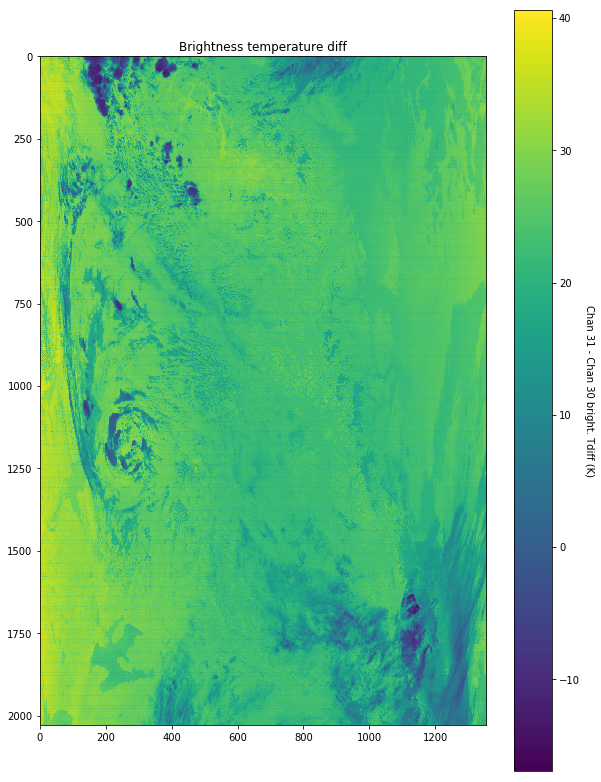

In [21]:
from pyhdf.SD import SD, SDC
from a301.radiation import planck_invert
from matplotlib import pyplot as plt

this_dir=Path.cwd()
#move up one one folder and down to data
data_dir = this_dir.parent / Path('data')
hdf_file=data_dir / Path('modis_chans.hdf')
if not hdf_file.is_file():
    print(f"looking for file named {hdf_file}, doesn't exist")
    raise ValueError()
the_file = SD(str(hdf_file), SDC.READ)
#
# read in radiances in W/m^2/sr/micron and convert to MKS
#
ch30_rads = the_file.select('ch30').get()*1.e6
ch31_rads = the_file.select('ch31').get()*1.e6
#
#https://modis.gsfc.nasa.gov/about/specifications.php
#central wavelengths for each channel in meters
#
#
wavel_30= 1.e-6*(9.580 + 9.880)/2.
wavel_31= 1.e-6*(10.780 + 11.280)/2.

Tbright30=planck_invert(wavel_30,ch30_rads)
Tbright31=planck_invert(wavel_31,ch31_rads)
bright_diff = Tbright31 - Tbright30


fig,ax = plt.subplots(1,1,figsize = (10,14))
CS=ax.imshow(bright_diff)
cax=fig.colorbar(CS)
ax.set_title('Brightness temperature diff')
out=cax.ax.set_ylabel('Chan 31 - Chan 30 bright. Tdiff (K)')
out.set_verticalalignment('bottom')
out.set_rotation(270)




    


In [13]:
import a301
help(a301.radiation.planck_invert)

Help on function planck_invert in module a301.radiation:

planck_invert(wavel, Lstar)
    Calculate the brightness temperature
    
    Parameters
    ----------
    
      wavel: float
           wavelength (meters)
    
      Lstar: float or array
           Blackbody radiance (W/m^2/m/sr)
    Returns
    -------
    
    Tbright:  float or arr
           brightness temperature (K)

